# 🖼️ Image Processing and Computer Vision with OpenCV


This notebook covers key concepts in image processing and computer vision using OpenCV. Topics include:

- Filtering (Gaussian, Median, Bilateral)
- Thresholding (Binary, Adaptive, Otsu)
- Edge Detection (Sobel, Canny)
- Real-time webcam filters
- Example projects: Cartoon Filter, Pencil Sketch, Background Blur


## 🔹 Filtering Theory


Filtering is used to smooth images, remove noise, and enhance features. Common filters:
- **Box (Mean) Filter**
- **Gaussian Filter**
- **Median Filter**
- **Bilateral Filter**


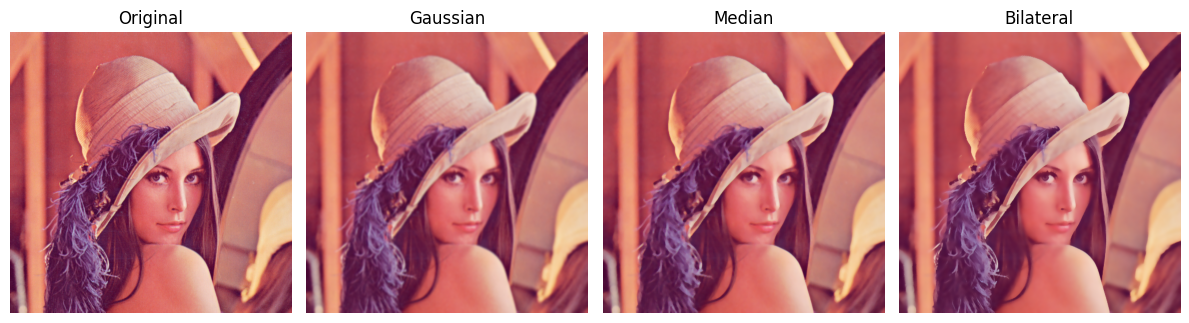

In [1]:

import cv2
import matplotlib.pyplot as plt

img = cv2.imread(cv2.samples.findFile("lena.png"))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

blur = cv2.GaussianBlur(img, (7, 7), 1.5)
median = cv2.medianBlur(img, 5)
bilateral = cv2.bilateralFilter(img, 9, 75, 75)

plt.figure(figsize=(12,4))
plt.subplot(1,4,1); plt.imshow(img); plt.title("Original"); plt.axis('off')
plt.subplot(1,4,2); plt.imshow(blur); plt.title("Gaussian"); plt.axis('off')
plt.subplot(1,4,3); plt.imshow(median); plt.title("Median"); plt.axis('off')
plt.subplot(1,4,4); plt.imshow(bilateral); plt.title("Bilateral"); plt.axis('off')
plt.tight_layout(); plt.show()


## 🔹 Thresholding

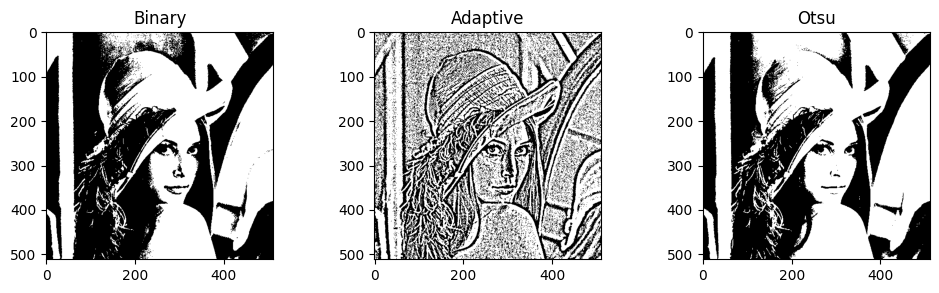

In [2]:

gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

_, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
adaptive = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                 cv2.THRESH_BINARY, 11, 2)
_, otsu = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

plt.figure(figsize=(10,3))
plt.subplot(1,3,1); plt.imshow(binary, cmap='gray'); plt.title("Binary")
plt.subplot(1,3,2); plt.imshow(adaptive, cmap='gray'); plt.title("Adaptive")
plt.subplot(1,3,3); plt.imshow(otsu, cmap='gray'); plt.title("Otsu")
plt.tight_layout(); plt.show()


## 🔹 Edge Detection

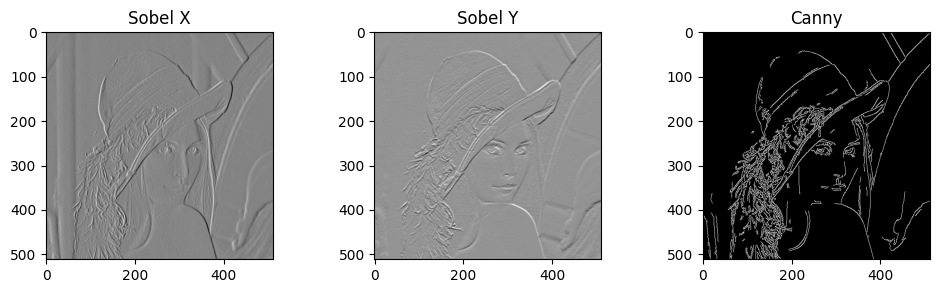

In [3]:

sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
edges = cv2.Canny(gray, 100, 200)

plt.figure(figsize=(10,3))
plt.subplot(1,3,1); plt.imshow(sobelx, cmap='gray'); plt.title("Sobel X")
plt.subplot(1,3,2); plt.imshow(sobely, cmap='gray'); plt.title("Sobel Y")
plt.subplot(1,3,3); plt.imshow(edges, cmap='gray'); plt.title("Canny")
plt.tight_layout(); plt.show()


## ✅ Real-Time Webcam Filter: Cartoon Effect

(-0.5, 511.5, 511.5, -0.5)

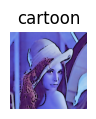

In [4]:

def cartoonize_image(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray_blur = cv2.medianBlur(gray, 7)
    edges = cv2.adaptiveThreshold(gray_blur, 255,
                                  cv2.ADAPTIVE_THRESH_MEAN_C,
                                  cv2.THRESH_BINARY, 9, 10)
    color = cv2.bilateralFilter(img, 9, 300, 300)
    cartoon = cv2.bitwise_and(color, color, mask=edges)
    return cartoon

# Uncomment to run with webcam
# cap = cv2.VideoCapture(0)
# while True:
#     ret, frame = cap.read()
#     cartoon = cartoonize_image(frame)
#     cv2.imshow('Cartoon Filter', cartoon)
#     if cv2.waitKey(1) & 0xFF == ord('q'):
#         break
# cap.release()
# cv2.destroyAllWindows()
img1 = cv2.imread(cv2.samples.findFile("lena.png"))
cartoon = cartoonize_image(img1)
plt.figure(figsize=(12,1))
plt.subplot(1,4,1); plt.imshow(cartoon); plt.title("cartoon"); plt.axis('off')


## ✅ Real-Time Webcam Filter: Pencil Sketch Effect

(-0.5, 511.5, 511.5, -0.5)

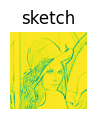

In [5]:

def pencil_sketch(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    inv = 255 - gray
    blur = cv2.GaussianBlur(inv, (21, 21), 0)
    sketch = cv2.divide(gray, 255 - blur, scale=256)
    return sketch

# Uncomment to run with webcam
# cap = cv2.VideoCapture(0)
# while True:
#     ret, frame = cap.read()
#     sketch = pencil_sketch(frame)
#     cv2.imshow('Pencil Sketch', sketch)
#     if cv2.waitKey(1) & 0xFF == ord('q'):
#         break
# cap.release()
# cv2.destroyAllWindows()
sketch = pencil_sketch(img1)
plt.figure(figsize=(25,1))
plt.subplot(1,1,1); plt.imshow(sketch); plt.title("sketch"); plt.axis('off')


## ✅ Real-Time Webcam Filter: Background Blur

(-0.5, 511.5, 511.5, -0.5)

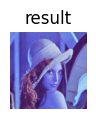

In [6]:

def blur_background(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _, mask = cv2.threshold(gray, 120, 255, cv2.THRESH_BINARY)
    blurred = cv2.GaussianBlur(img, (21, 21), 0)
    mask_inv = cv2.bitwise_not(mask)
    fg = cv2.bitwise_and(img, img, mask=mask)
    bg = cv2.bitwise_and(blurred, blurred, mask=mask_inv)
    return cv2.add(fg, bg)

# Uncomment to run with webcam
# cap = cv2.VideoCapture(0)
# while True:
#     ret, frame = cap.read()
#     result = blur_background(frame)
#     cv2.imshow('Background Blur', result)
#     if cv2.waitKey(1) & 0xFF == ord('q'):
#         break
# cap.release()
# cv2.destroyAllWindows()
result = blur_background(img1)
plt.figure(figsize=(25,1))
plt.subplot(1,1,1); plt.imshow(result); plt.title("result"); plt.axis('off')


## ✅ Thresholding with GUI Trackbars

In [7]:

def nothing(x):
    pass

img = cv2.imread(cv2.samples.findFile("lena.png"), 0)
cv2.namedWindow('Threshold')

cv2.createTrackbar('Thresh', 'Threshold', 0, 255, nothing)

while True:
    thresh = cv2.getTrackbarPos('Thresh', 'Threshold')
    _, threshed = cv2.threshold(img, thresh, 255, cv2.THRESH_BINARY)
    cv2.imshow('Threshold', threshed)
    if cv2.waitKey(1) & 0xFF == 27:
        break
cv2.destroyAllWindows()
